In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_excel('processadores_limpo.xlsx')

Total de vendas por fabricante:
fabricante
AMD             183268.54
Desconhecido       616.00
Intel           244561.12
Name: preço, dtype: float64


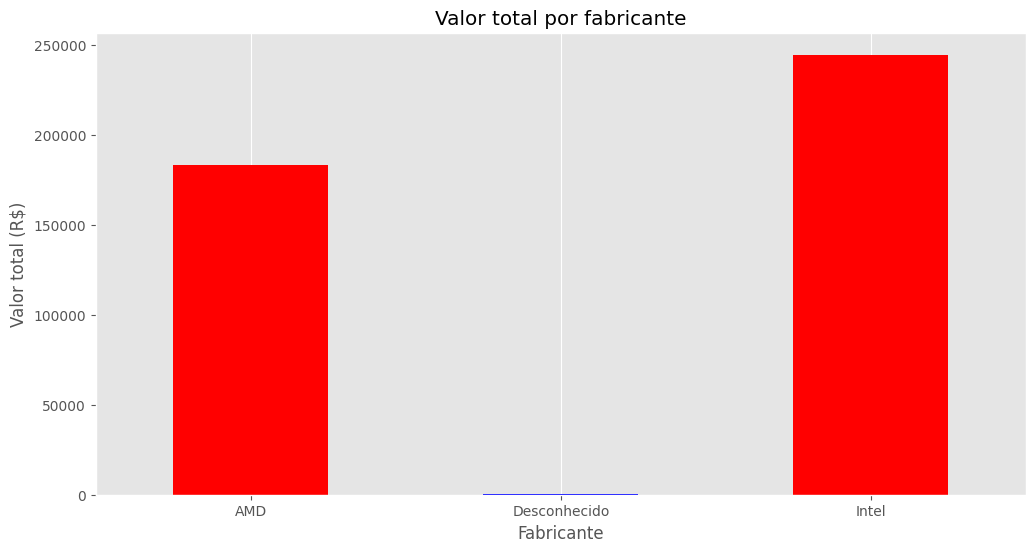

In [56]:
# 1. Análise por Fabricante
total_vendas_fabricante = df.groupby('fabricante')['preço'].sum()

print("Total de vendas por fabricante:")
print(total_vendas_fabricante)

total_vendas_fabricante.plot(kind='bar', color=['red', 'blue'])
plt.title('Valor total por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Valor total (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Preço médio por soquete:
Soquetes
AM5          2769.884167
LGA1851      2669.000000
FCLGA1200    2546.990000
LGA1700      2110.268101
LGA1200      1196.552391
AM4          1170.095349
LGA1156       568.980000
FCLGA1151     451.566667
LGA1151       432.912000
LGA1155       294.386471
LGA1150       278.346000
FCLGA1155     221.115000
FCLGA1150     195.580000
Name: preço, dtype: float64


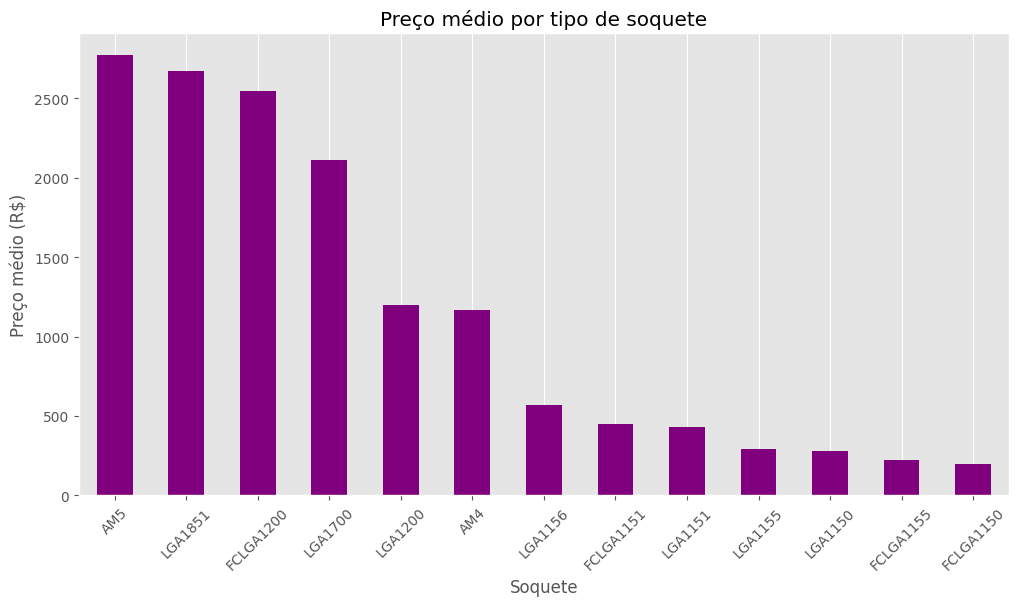

In [57]:
# 2. Preço médio por soquete
preco_medio_soquete = df.groupby('Soquetes')['preço'].mean().sort_values(ascending=False)

print("\nPreço médio por soquete:")
print(preco_medio_soquete)

preco_medio_soquete.plot(kind='bar', color='purple')
plt.title('Preço médio por tipo de soquete')
plt.xlabel('Soquete')
plt.ylabel('Preço médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Quantidade de modelos por série:
serie
Ryzen 7    32
Ryzen 5    31
Ryzen 9    20
Ryzen 3     8
Name: count, dtype: int64


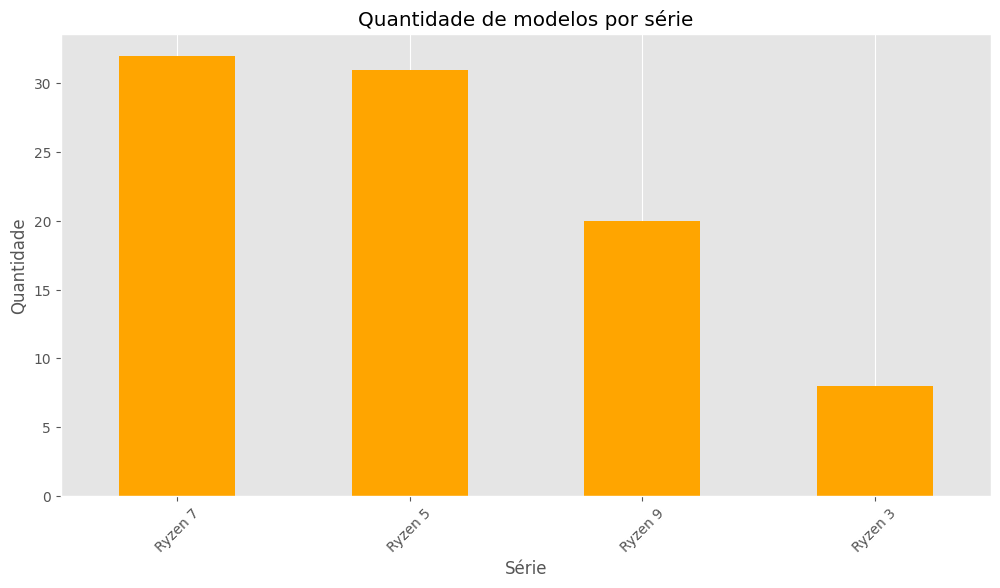

In [58]:
# 3. Quantidade de modelos por série
df['serie'] = df['Modelo'].str.extract(r'(Ryzen \d|Core i\d)')
qtd_modelos_serie = df['serie'].value_counts()

print("\nQuantidade de modelos por série:")
print(qtd_modelos_serie)

qtd_modelos_serie.plot(kind='bar', color='orange')
plt.title('Quantidade de modelos por série')
plt.xlabel('Série')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Top 10 processadores mais caros:
Modelo
Core I9 14900KS    7822.55
Ryzen 9 9950X3D    5299.99
Ryzen 9 9950X3D    5129.90
Ryzen 9 9900X      5007.10
Ryzen 9 7950X3D    5005.11
Ryzen 9 7950X3D    4999.99
Ryzen 9 9900X3D    4785.81
Core I9 13900K     4779.00
Core I7 14700K     4742.36
Ryzen 7 7800X3D    4599.90
Name: preço, dtype: float64


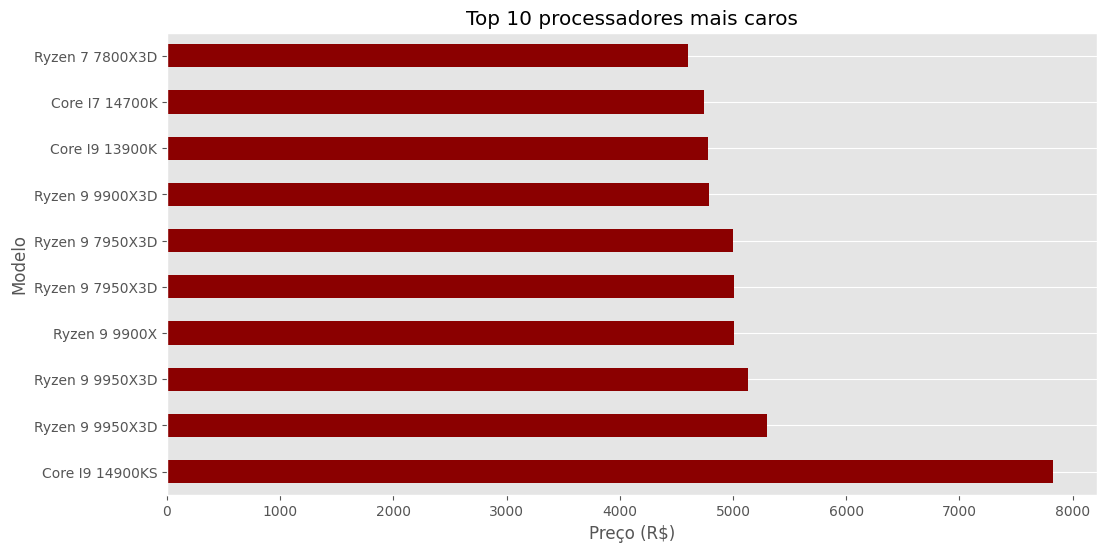

In [59]:
# 4. Top 10 processadores mais caros
top10_caros = df.nlargest(10, 'preço').set_index('Modelo')['preço']

print("\nTop 10 processadores mais caros:")
print(top10_caros)

top10_caros.plot(kind='barh', color='darkred')
plt.title('Top 10 processadores mais caros')
plt.xlabel('Preço (R$)')
plt.ylabel('Modelo')
plt.grid(axis='x')
plt.show()


Preço médio com/sem vídeo integrado:
tem_video
False    1480.896507
True     2178.545366
Name: preço, dtype: float64


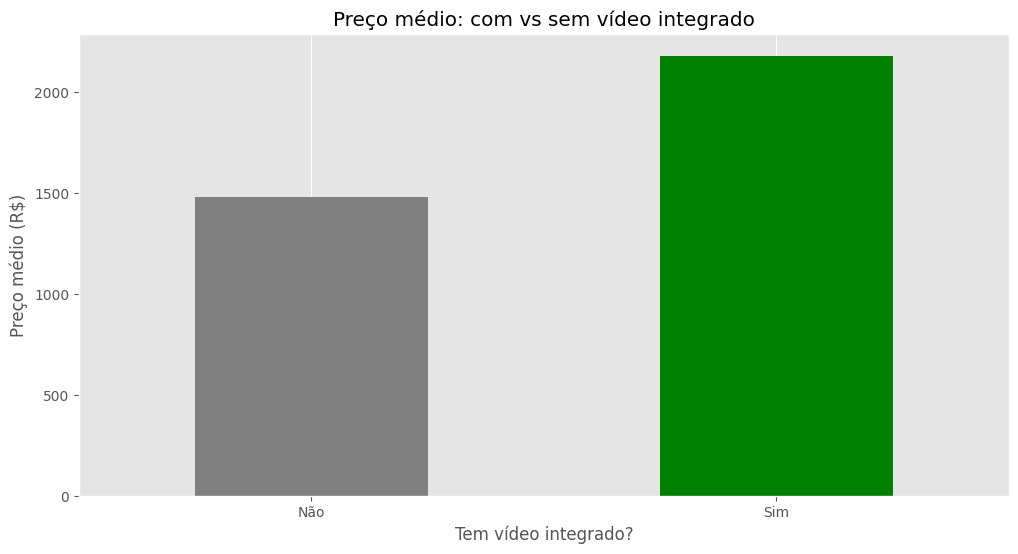

In [62]:
# 5. Comparação com/sem vídeo integrado
df['tem_video'] = df['marca'].str.contains('Vídeo Integrado|Radeon Graphics', case=False)
preco_video = df.groupby('tem_video')['preço'].mean()

print("\nPreço médio com/sem vídeo integrado:")
print(preco_video)

preco_video.plot(kind='bar', color=['gray', 'green'])
plt.title('Preço médio: com vs sem vídeo integrado')
plt.xlabel('Tem vídeo integrado?')
plt.ylabel('Preço médio (R$)')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.grid(axis='y')
plt.show()